# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset

In [2]:
import pathlib

base_path = pathlib.Path(pathlib.os.getcwd()) / "data" / "waymo" / "training_and_validation"
tf_record_path = str(list(base_path.glob("*"))[0])
dataset = get_dataset(tf_record_path)

INFO:tensorflow:Reading unweighted datasets: ['/app/project/nd013-c1-vision-starter/data/waymo/training_and_validation/segment-10444454289801298640_4360_000_4380_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/app/project/nd013-c1-vision-starter/data/waymo/training_and_validation/segment-10444454289801298640_4360_000_4380_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def display_instances(dataset):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    colormap = {1: (1, 0, 0), 2: (0, 1, 0), 4: (0, 0, 1)}
    f, ax = plt.subplots(2, 5, figsize=(20 ,10))
    for i, batch in enumerate(dataset.shuffle(75).take(10)):
        img = batch['image'].numpy()
        gt_classes = batch['groundtruth_classes'].numpy()
        gt_boxes = batch['groundtruth_boxes'].numpy() * img.shape[0]
        
        x = i % 2
        y = i % 5
        ax[x, y].imshow(img)
        for cls, box in zip(gt_classes, gt_boxes):
            y1, x1, y2, x2 = box
            rec = Rectangle((x1, y1), x2 - x1, y2 - y1, facecolor='none', edgecolor=colormap[cls])
            ax[x, y].add_patch(rec)
        ax[x, y].axis('off')
    
    plt.tight_layout()
    plt.show()
    plt.close()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

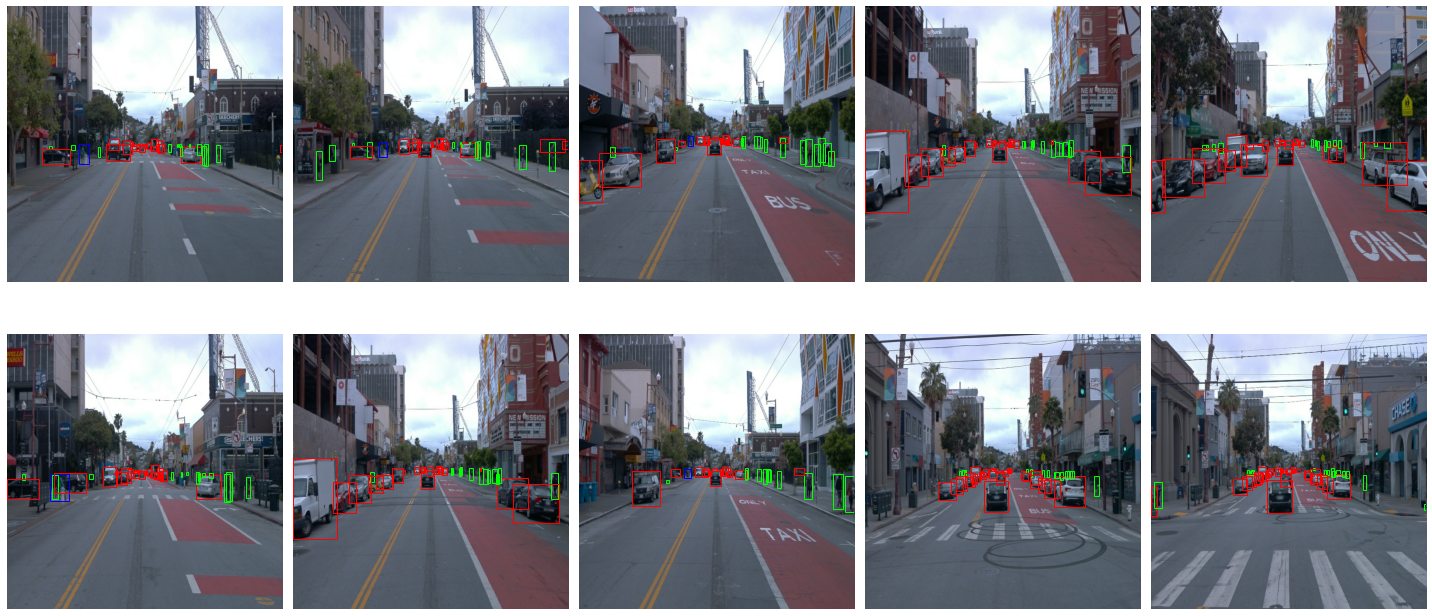

In [4]:
## STUDENT SOLUTION HERE
display_instances(dataset)


## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [5]:
### Dataset basic analysis
import numpy as np

for batch in dataset.take(1):
    for k, v in batch.items():
        if k == 'image':
            print(f"{k}: {v.shape}")
        
        ### GT boxes are normalized by the image shape so I re-normalize it and check the max & min value of a sample
        elif k == 'groundtruth_boxes':
            v = v.numpy()
            v *= 640
            print(f"{k} max: {np.max(v)}")
            print(f"{k} min: {np.min(v)}")
        else:
            print(f"{k}: {v}")

image: (640, 640, 3)
source_id: b'segment-10444454289801298640_4360_000_4380_000_with_camera_labels_100.tfrecord'
key: b''
filename: b'segment-10444454289801298640_4360_000_4380_000_with_camera_labels_100.tfrecord'
groundtruth_image_confidences: []
groundtruth_verified_neg_classes: []
groundtruth_not_exhaustive_classes: []
groundtruth_boxes max: 619.4844970703125
groundtruth_boxes min: 0.0
groundtruth_area: []
groundtruth_is_crowd: []
groundtruth_difficult: []
groundtruth_group_of: []
groundtruth_weights: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
groundtruth_classes: [1 1 2 1 2 1 2 1 1 1 1 2 2 1 2 1 1 2 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 1]
groundtruth_image_classes: []
original_image_spatial_shape: [640 640]


In [6]:
### # of objects analysis
import pathlib
import pickle
from utils import get_dataset

base_path = pathlib.Path().cwd() / 'data' / 'waymo' / 'training_and_validation'
tf_record_path = [str(path) for path in list(base_path.glob("*"))][0]
save_path = pathlib.Path().cwd() / 'EDA_result'
dataset = get_dataset(tf_record_path)

INFO:tensorflow:Reading unweighted datasets: ['/app/project/nd013-c1-vision-starter/data/waymo/training_and_validation/segment-10444454289801298640_4360_000_4380_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/app/project/nd013-c1-vision-starter/data/waymo/training_and_validation/segment-10444454289801298640_4360_000_4380_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


In [16]:
### Number of Objects Analysis
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

def count_class(_dataset):
    _dataset = _dataset.batch(1)
    iter_dataset = iter(_dataset)
    class_np = np.array([range(5), [0 for _ in range(5)]])  ## Just index 1, 2, 4 columns are used as class numbers.
    img_list = []
    flag = True
    # print(len(iter_dataset))
    i = 0
    while True:
    # for i in range(20):
        try:
            batch = next(iter_dataset)  
            # print(batch['groundtruth_classes'])
            print(f"{i+1} data done.", end="\r")
            i += 1            
        except:
            break
    # for i, batch in enumerate(next(iter_dataset)):
        # print(f"{i+1} data done.", end="\r")
        # print(batch)
        # img = batch['image'].numpy()
        
        # for test in img_list:
        #     if np.array_equal(img, test):
        #         flag = False
        # if flag:
        #     img_list.append(img)
        
        # print(f"{i+1} data done. img_list: {len(img_list)}", end='\r')
        # cv2.imshow("waymo", img)
        
        # key = cv2.waitKey(1000)
        # if key & 0xFF == ord('q'):
        #     cv2.destroyAllWindows()
        #     break
    #     gt_classes = batch['groundtruth_classes'].numpy()
    #     unique, count = np.unique(gt_classes, return_counts=True)
    #     for uniq, cnt in zip(unique, count):
    #         class_np[1, uniq] += cnt
            
    # plt.plot(class_np[0], class_np[1])
    # plt.show()
    # plt.close()
    
    return class_np

class_np = count_class(dataset)

TypeError: object of type 'OwnedIterator' has no len()